# 神经网络的学习
- 从训练数据集中获得最优参数的过程，记神经网络的反向传播过程
- 深度学习是一种新的编程方法，摆脱了以往以人为中心的思想，所有的东西都让数据发声
## 传统算法&机器学习&深度学习
- 传统算法：人能想到的算法,然后编写算法规则，即把假设空间写死
- 机器学习：人能想到的特征，提取特征向量，机器学习（SVM/KNN）
- 深度学习：数据->答案
- 所以也称机器学习是一种端到端的学习方式
## 以识别手写数字为例说明三种算法的思路
### 传统算法
- 把(28*28)**256所有的情况都枚举出来
- 然后写分支判断语句，判断每种情况是哪种分类
- 但这种情况是不行的，因为(28*28)**256是一个天文数字，写不出来这样的代码
### 机器学习
- 提取特征：比如说边缘、角点、纹理、统计特征等
- 然后使用机器学习算法，比如SVM/KNN
- 最后就能比较好的将图片分类
### 深度学习
- 将图片数据直接喂给深度学习算法，比如神经网络
- 通过反向传播机制，让算法自己找到最好的假设空间
- 最后能比较好的进行图片分类

## 均方误差
- 使用公式表达均方误差：$ E = 1/2 \sum_k (yk - tk)^2$

In [1]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
# 使用softmax预测出来的一组数字的概率
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 使用one-hot编码的标签，这个样本的真实标签是2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 计算示例中的均方误差
# 也就说这个样本所产生的均方误差大概是0.1
print(mean_squared_error(np.array(y), np.array(t)))

# 再来计算一个样本的均方误差
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
# 假设真实标签还是2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 由于预测出来是7的概率最大，所以这个样本的损失还是比较大的
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## 交叉熵误差
- 使用公式表达交叉熵误差：$ E = - \sum_k tk \log(yk) $
- 相对于均方误差，这个误差只考虑真实标签那个预测情况，预测概率越接近于1，误差越小，反之越大

In [2]:
# 以上面mnist的结果，计算一下交叉熵的损失
def cross_entropy_error(y, t):
    # 为了防止log(0)对结果溢出，加上一个比较小的量，根据softmax的例子
    # 即使加了这delta也不影响最终的概率分布
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 预测比较失败的那个交叉熵损失是多少
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.3025840929945454


# mini-batch学习
- 机器学习的过程就是对损失函数学习的过程
- 前面介绍的损失只是对单个样本的损失，损失函数的求解是对所有样本的损失的求和
- 但是所有的样本又太大了，学习起来成本太高
- 所以训练的时候常常将一些样本捆绑起来，形成一个batch，然后对一个batch进行学习
- 一个batch的交叉熵损失函数可以用公式表达为：$ E = -1/N \sum_N \sum_k tk \log(yk) $
- 其中N是batch的大小，k是每个样本的索引，yk是预测的概率，tk是真实的类别

In [3]:
# 使用keras加载mnist数据集
import numpy as np
from keras.datasets import mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)
# 把特征空间拉平，并转换成[0, 1]区间的值，把28*28的图片变成一维的
# 把标签空间转换成one-hot编码
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
t_train = np.eye(10)[t_train.astype('int32')]
t_test = np.eye(10)[t_test.astype('int32')]
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

2022-04-25 17:18:47.449141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 17:18:47.449176: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [4]:
# 随机从训练集中抽取一些数据，用于训练
import numpy as np
# 从[0, 60000)区间随机抽取10个数字
batch_mask = np.random.choice(x_train.shape[0], 10)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)
print(x_batch.shape)
print(t_batch.shape)
print(type(x_batch))
print(type(t_batch))
print(x_batch)
print(t_batch)

[16950 39420  8350 13679 51388 11157 25590  1644 50493 32269]
(10, 784)
(10, 10)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
# 一个batch的交叉熵损失函数定义
def cross_entropy_error(y, t):
    # 如果仅有一个样本，那么就给它增加一个维度，表示是单一样本
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [6]:
# 单个样本的交叉熵损失
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))
# 多个样本的交叉熵损失
# 模拟生成10个样本的概率分布
y = np.array(y*10)
print(y.shape)
print(cross_entropy_error(y, t_batch))

2.3025840929945454
(100,)
94.18283726144865


## 为什么必须要有损失函数
- 问题：深度学习模型最终的目的是为了提高准确率，模型的学习策略可以设置为提高学习率就可以了！但是为什么还要有损失函数的出现？
- 如果设置了损失函数作为学习率，会导致整个学习的过程停滞不前——参数的导数大部分都会变成0
- 在深度学习得到参数时，如果这个参数函数的导数为正，那么我们就减小这个参数；反之如果导数为负，那么我们就增大这个参数，最后慢慢的变化，就会使得最后的模型变好
- 但是精度函数是一个离散的函数，比如说批量是100时，这个精度只会在[0,1,0.01]这100个值选择，比如说我们一组参数使得精度为32.1%，另一组参数为32.2%。那么模型是感知不到参数的调整会让模型变优的。
- 反之损失函数是一个连续的函数就不存在这个问题
- 同样的，一般不能使用阶跃函数作为激活函数也是这个道理，因为阶跃函数是一个离散的函数

## 数值微分
### 导数
导数的定义可以用公式表达为：$$ \frac{\partial f(x)}{\partial x} = \lim_{\epsilon \to 0} \frac{f(x + \epsilon) - f(x)}{\epsilon} $$

In [7]:
# 不好的实现
# 注意这里函数式编程的技巧，输入的f是一个函数
import numpy as np
def numerical_diff_bad(f, x):
    delta = np.float32(1e-50)
    return (f(x+delta)-f(x))/delta

In [8]:
# 上面的函数有两个问题
# 一个问题问题是：delta的值太小，会被当成0
import numpy as np
print(np.float32(1e-50))
print(np.float32(1e-50)==0)
print(np.float32(1e-4))
print(np.float32(1e-4)==0)
# 另一个问题是：我们想要的是在x点处的导数，这样求出来是[x, x+delta]之间的导数
# 解决的办法是：所以要在左右两边去一个均值


0.0
True
1e-04
False


In [9]:
import numpy as np
def numerical_diff(f, x):
    delta = 1e-4
    return (f(x+delta)-f(x-delta))/(2*delta)

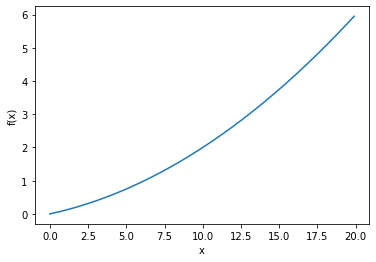

In [10]:
# 使用numerical_diff函数求导
import numpy as np 
import matplotlib.pyplot as plt
def function_1(x):
    return 0.01*x**2 + 0.1*x
# 画出来上面的函数曲线
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [11]:
# 来计算在5, 10两个点的导数
# 根据高中知识上面那个函数的导数公式：g(x)=0.02x + 0.1
# 所以计算的结果是对的
print(f'这个函数在5这个点的导数是：{numerical_diff(function_1, 5)}')
print(f'这个函数在10这个点的导数是：{numerical_diff(function_1, 10)}')

这个函数在5这个点的导数是：0.1999999999990898
这个函数在10这个点的导数是：0.2999999999986347


### 偏导数
- 前面的导数只是说明了自变量只有一个的情况下的导数情况
- 这里说明自变量是多个的情况下的导数
- 可以简单理解为将其他变量都固定下来，只求一个变量的导数
- 最后的结果可以这样解释
- 原来的函数图像是一个三维的
- 在x[0]和y组成的平面中在[3,4]这个点上的斜率是6
- 在x[1]和y组成的平面中在[3,4]这个点上的斜率是8

In [12]:
import numpy as np
# 与前面不同的是，前面x是一个标量，这里x是一个向量
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)
# 现在比如说要求[3, 4]这个点的偏导数
# 重新定义一个函数，将x[1]固定在4这个点
def function_tmp1(x):
    return x**2 + 4**2
# 重新定义一个函数，将x[0]固定在3这个点
def function_tmp2(x):
    return 3**2 + x**2
# 求出来x[0]的偏导数
print(f'这个函数在[3, 4]这个点的偏导数是：{numerical_diff(function_tmp1, 3)}')
# 求出来x[1]的偏导数
print(f'这个函数在[3, 4]这个点的偏导数是：{numerical_diff(function_tmp2, 4)}')

这个函数在[3, 4]这个点的偏导数是：6.00000000000378
这个函数在[3, 4]这个点的偏导数是：7.999999999999119


### 梯度
- 在某个点上的梯度是指这个点偏导数
- 梯度的维度和输入的维度一致

In [13]:
import numpy as np
def numerical_gradient(f, x):
    delta = 1e-4
    # 梯度的维度和x的维度一样
    grad = np.zeros_like(x)
    # 对每个维度求偏导
    for idx in range(x.size):
        # 当前维度，要求解梯度的那个点的坐标
        tmp_val = x[idx]
        # f(x+delta)
        x[idx] = tmp_val + delta
        fx1 = f(x)
        # f(x-delta)
        x[idx] = tmp_val - delta
        fx2 = f(x)
        # 求偏导
        grad[idx] = (fx1-fx2)/(2*delta)
        # 恢复x的值
        x[idx] = tmp_val
    return grad

In [14]:
# 测试一下函数2的梯度
import numpy as np
# x是一个向量
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


## 梯度法
- 深度学习的过程是使用梯度法寻找最优参数的过程
- 梯度法可以用公式表达为：
$$ x_0 = x_0 - \alpha \frac{\partial f}{\partial x_0} $$
$$ x_1 = x_1 - \alpha \frac{\partial f}{\partial x_1} $$

In [15]:
# 使用简单的函数实现梯度下降
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        # 滑向最低点的过程
        x -= lr*grad
    # 返回最低点的那个梯度
    return x

In [16]:
# 测试一下
def function_2(x):
    return np.sum(x**2)
# 初始化小球在的那个点
x = np.array([-3.0, 4.0])
# 从可视化的那个图形可以看出来，最低调就是x[0], x[1]导数都是0的那个点
gradient_descent(function_2, init_x=x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [17]:
# 学习率过大，模型最后收敛的并不好
x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=x, lr=10.0, step_num=100))

[-2.58983747e+13 -1.29524862e+12]


In [18]:
# 学习率过小，模型最后收敛的也不好
x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=x, lr=1e-10, step_num=100))

[-2.99999994  3.99999992]


## 神经网络的梯度
- 也是一个矩阵的梯度
- 下面这个例子中，假设神经网络只有一层，形状是(2,3)。暂且忽略偏置项

In [19]:
# 这设计python类中的函数的时候，如果要自己调用自己，那么一定要传入self参数，否则会报错
class simpleNet:
    def cross_entropy_error(self, y, t):
        return -np.sum(t*np.log(y))
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x))
    def __init__(self):
        self.W = np.random.randn(2, 3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = self.softmax(z)
        loss = self.cross_entropy_error(y, t)
        return loss

In [20]:
# 验证上面的简单的神经网络
net = simpleNet()
print(f'权重参数是：{net.W}')
# 给定一个假设样本的特征和标签
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])
p = net.predict(x)
print(f'这个网络的预测结果是：{p}')
# 返回最大的索引，和实际结果差不多
print(f'预测最大的那个索引是：{np.argmax(p)}')
# 计算损失
print(f'这个网络的损失是：{net.loss(x, t)}')

权重参数是：[[ 0.47412058  0.49296901  1.58017092]
 [-0.83625698 -1.15110694 -1.60922946]]
这个网络的预测结果是：[-0.46815893 -0.74021484 -0.50020396]
预测最大的那个索引是：0
这个网络的损失是：1.0364472338066975


In [22]:
# 与前面的不同的是，这里输入的张量是2D的，所以重新使用书中的函数
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

In [23]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [24]:
print(dW)

[[ 0.21975811  0.16741429 -0.38717241]
 [ 0.32963717  0.25112144 -0.58075861]]


## 学习算法的实现
### 神经网络的学习步骤
1. 随机选择一个mini-batch，我们的优化目标就是让这个mini-batch的损失函数最小
2. 计算出来各个权重参数的梯度
3. 沿着梯度的方向，对权重参数做微小的调整，使得损失函数可以变小
4. 回到步骤一，重复上面的三个步骤

In [1]:
# 引入原来书籍中的脚本
%run ./common/functions.py
%run ./common/gradient.py

In [2]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 随机初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [3]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [4]:
# 伪造100个训练样本
x = np.random.rand(100, 784)
y = net.predict(x)

In [5]:
# 计算梯度是一个比较贵的事情
x = np.random.rand(100, 784)
# 伪装正确的100个标签分布
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b1'].shape)

(784, 100)
(100,)
(100, 10)
(100,)
